# Exercise 5 | Regularized Linear Regression and Bias-Variance


In [375]:
# Initialization
from ex5func import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.io as scio
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 9.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Part 1: Loading and Visualizing Data
We start the exercise by first loading and visualizing the dataset.
The following code will load the dataset into your environment and plot
the data.

Loading and Visualizing Data ...



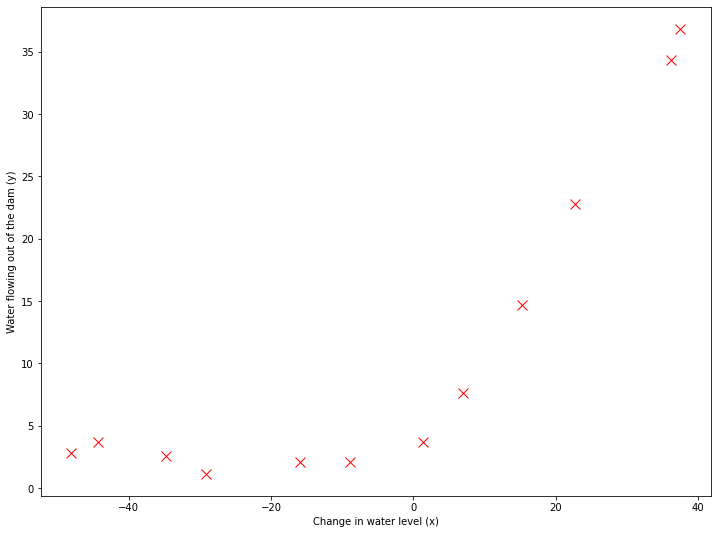

In [376]:
# Load Training Data
print('Loading and Visualizing Data ...\n')
data = scio.loadmat('ex5data1.mat')
X,y=data['X'],data['y'][:,0]
Xtest,ytest=data['Xtest'],data['ytest'][:,0]
Xval,yval=data['Xval'],data['yval'][:,0]
# Plot training data
m=X.shape[0]
plt.figure()
plt.plot(X,y,'rx',linewidth=1.5,markersize=10)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

## Part 2: Regularized Linear Regression Cost
You should now implement the cost function for regularized linear
regression.

In [377]:
theta = np.array([1,1])
J,_ = linearRegCostFunction(np.hstack((np.ones((m, 1)),X)), y, theta, 1)

print('Cost at theta = [1 ; 1]: %f \n(this value should be about 303.993192)\n' % J)

Cost at theta = [1 ; 1]: 303.993192 
(this value should be about 303.993192)



## Part 3: Regularized Linear Regression Gradient
You should now implement the gradient for regularized linear
regression.

In [378]:
theta = np.array([1,1])
_,grad = linearRegCostFunction(np.hstack((np.ones((m, 1)),X)), y, theta, 1)
print('Gradient at theta = [1 ; 1]: {}\n(this value should be about [-15.303016; 598.250744])\n'.format(grad))

Gradient at theta = [1 ; 1]: [-15.30301567 598.25074417]
(this value should be about [-15.303016; 598.250744])



## Part 4: Train Linear Regression
Once you have implemented the cost and gradient correctly, the
trainLinearReg function will use your cost function to train
regularized linear regression.

Write Up Note: The data is non-linear, so this will not give a great
fit.

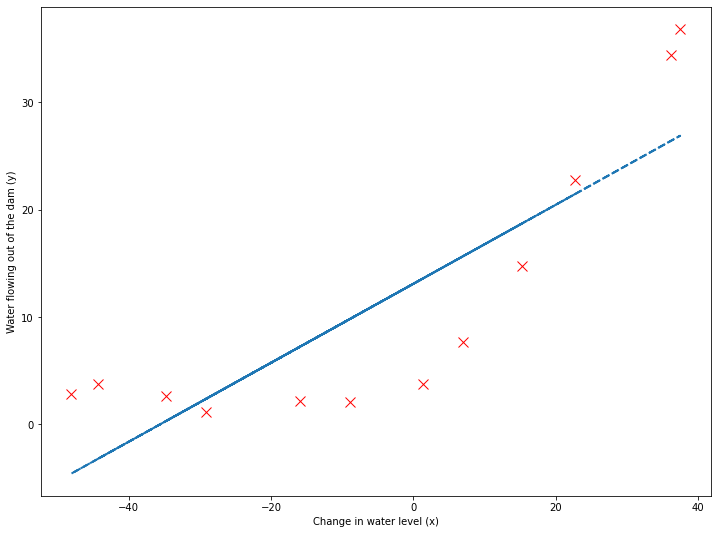

In [379]:
# Train linear regression with lambda = 0
lamb = 0
result= trainLinearReg(np.hstack((np.ones((m, 1)),X)), y, lamb)
theta=result.x
# Plot fit over the data
plt.figure()
plt.plot(X, y, 'rx', linewidth=1.5,markersize=10)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(X, np.hstack((np.ones((m, 1)),X)).dot(theta),'--',linewidth=2)
plt.show()


## Part 5: Learning Curve for Linear Regression
Next, you should implement the learningCurve function.
Write Up Note: Since the model is underfitting the data, we expect to
see a graph with "high bias" -- Figure 3 in ex5.pdf

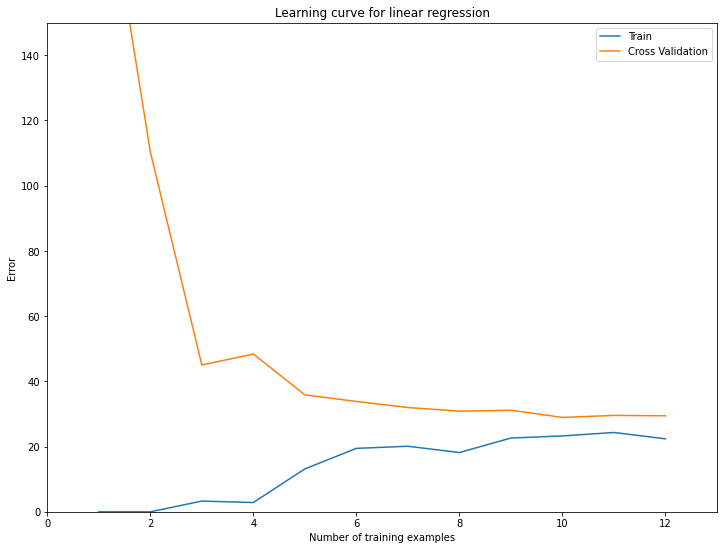

# Training Examples	Train Error	Cross Validation Error

  	0		[1.02399685e-17]	[209.1201341]

  	1		[9.67079641e-11]	[110.3012559]

  	2		[3.28659505]	[45.01023144]

  	3		[2.84267769]	[48.36890954]

  	4		[13.15404881]	[35.86516409]

  	5		[19.44396251]	[33.82996159]

  	6		[20.09852166]	[31.97098573]

  	7		[18.1728587]	[30.86244637]

  	8		[22.60940542]	[31.13599802]

  	9		[23.26146159]	[28.93620747]

  	10		[24.31724959]	[29.55143162]

  	11		[22.3739065]	[29.43381805]



In [380]:
lamb = 0
error_train, error_val=learningCurve(np.hstack((np.ones((m, 1)),X)),y,
                                     np.hstack((np.ones((Xval.shape[0], 1)),Xval)),
                                     yval,lamb)
plt.figure()
plt.plot(np.arange(1,m+1),error_train,np.arange(1,m+1),error_val)
plt.title('Learning curve for linear regression')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0,13,0,150])
plt.show()
print('# Training Examples\tTrain Error\tCross Validation Error\n')
for i in range(m):
    print('  \t{}\t\t{}\t{}\n'.format(i, error_train[i], error_val[i]))


## Part 6: Feature Mapping for Polynomial Regression
One solution to this is to use polynomial regression. You should now
complete polyFeatures to map each example into its powers

In [381]:
p = 8
# Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p)
X_poly, mu, sigma = featureNormalize(X_poly)
X_poly=np.hstack((np.ones((m, 1)),X_poly))

X_poly_test = polyFeatures(Xtest, p)
X_poly_test=(X_poly_test-mu)/sigma
X_poly_test=np.hstack((np.ones((X_poly_test.shape[0], 1)),X_poly_test))

X_poly_val = polyFeatures(Xval, p)
X_poly_val=(X_poly_val-mu)/sigma
X_poly_val=np.hstack((np.ones((X_poly_val.shape[0], 1)),X_poly_val))

print('Normalized Training Example 1:\n')
print('{}\n'.format(X_poly[0, :]))

Normalized Training Example 1:

[ 1.         -0.3782437  -0.78866232  0.19032872 -0.7375913   0.32025197
 -0.6171516   0.35983501 -0.53109126]



## Part 7: Learning Curve for Polynomial Regression
Now, you will get to experiment with polynomial regression with multiple
values of lambda. The code below runs polynomial regression with
lambda = 0. You should try running the code with different values of
lambda to see how the fit and learning curve change.

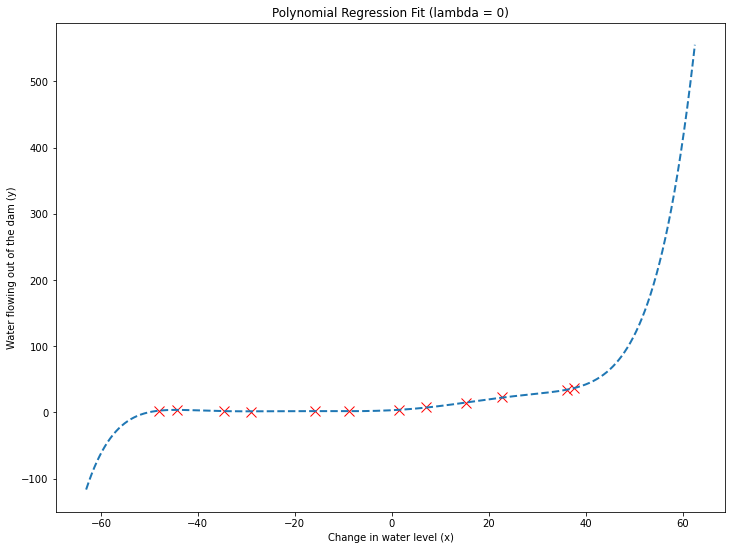

In [382]:
lamb = 0
theta = trainLinearReg(X_poly, y, lamb).x

# Plot training data and fit
plt.figure()
plt.plot(X, y, 'rx', linewidth=1.5,markersize=10)
plotFit(min(X), max(X), mu, sigma, theta, p)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title ('Polynomial Regression Fit (lambda = {})'.format(lamb))
plt.show()


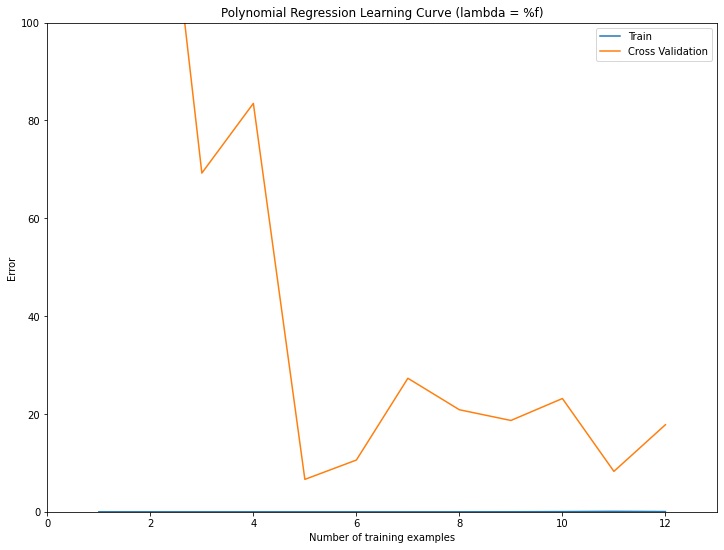

Polynomial Regression (lambda = 0.000000)


# Training Examples	Train Error	Cross Validation Error

  	0		[4.40523453e-20]	[164.2351956]

  	1		[1.2367739e-15]	[161.72161215]

  	2		[1.25550492e-20]	[69.23372289]

  	3		[1.20597309e-14]	[83.479597]

  	4		[2.95823132e-14]	[6.62609909]

  	5		[1.20841353e-10]	[10.57697646]

  	6		[2.80365549e-10]	[27.29491289]

  	7		[0.0003649]	[20.85613533]

  	8		[0.01170347]	[18.66920186]

  	9		[0.0416903]	[23.15336007]

  	10		[0.09305062]	[8.26282777]

  	11		[0.04805728]	[17.79897498]



In [383]:
plt.figure()
error_train, error_val =learningCurve(X_poly, y, X_poly_val, yval, lamb)
plt.plot(np.arange(1,m+1),error_train,np.arange(1,m+1),error_val)
plt.title('Polynomial Regression Learning Curve (lambda = %f)'.format(lamb))
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0,13,0,100])
plt.legend(['Train', 'Cross Validation'])
plt.show()
print('Polynomial Regression (lambda = %f)\n\n'%lamb)
print('# Training Examples\tTrain Error\tCross Validation Error\n')
for i in range(m):
    print('  \t{}\t\t{}\t{}\n'.format(i, error_train[i], error_val[i]))

## Part 8: Validation for Selecting Lambda
You will now implement validationCurve to test various values of
lambda on a validation set. You will then use this to select the
"best" lambda value.

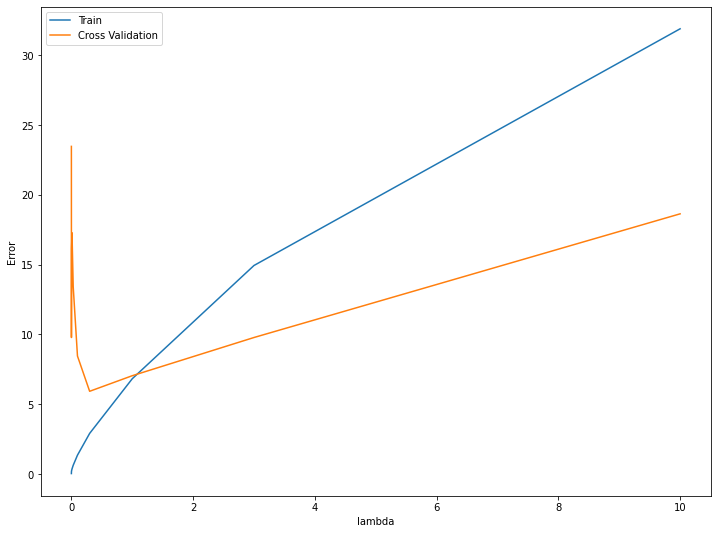

lambda		Train Error	Validation Error

  	0.0		[0.04320004]	[23.46166079]

  	0.001		[0.16954419]	[9.78068258]

  	0.003		[0.24318579]	[16.16026492]

  	0.01		[0.37128295]	[17.27596559]

  	0.03		[0.63670286]	[13.42153362]

  	0.1		[1.36057226]	[8.45467908]

  	0.3		[2.91764934]	[5.93202382]

  	1.0		[6.83046332]	[7.04713176]

  	3.0		[14.93764581]	[9.78219316]

  	10.0		[31.87815402]	[18.63391409]



In [384]:
lambda_vec, error_train, error_val=validationCurve(X_poly, y, X_poly_val, yval)

plt.figure()
plt.plot(lambda_vec, error_train, lambda_vec, error_val)
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('lambda')
plt.ylabel('Error')
plt.show()
print('lambda\t\tTrain Error\tValidation Error\n')
for i in range(len(lambda_vec)):
	print('  \t{}\t\t{}\t{}\n'.format(lambda_vec[i], error_train[i], error_val[i]))

